In [39]:
%config InlineBackend.figure_format = 'retina'
from scipy.cluster import hierarchy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from hmr import Reloader
import heatgraphy as hg

hg = Reloader(hg)


In [40]:
data = np.random.randint(0, 10, (10, 3))

data_count = np.array([15, 10, 10])
datasets = [np.random.randn(c, 3) for c in data_count]

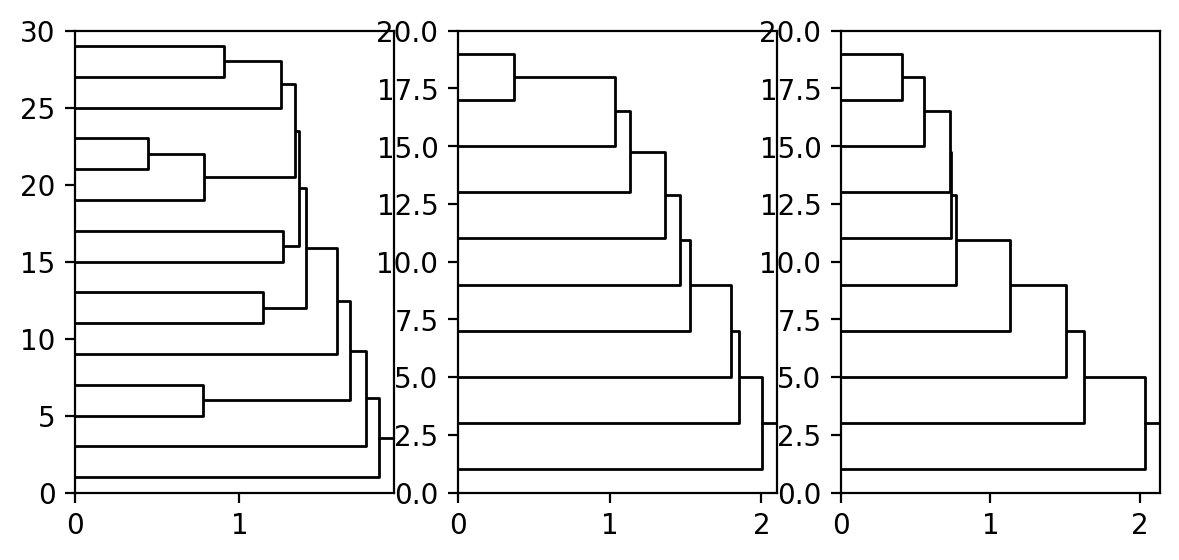

In [41]:
_, axes = plt.subplots(1, 3, figsize=(7, 3))
for data, ax in zip(datasets, axes):
    dg = hg.Dendrogram(data)
    dg.draw(ax, orient="v", add_root=True)

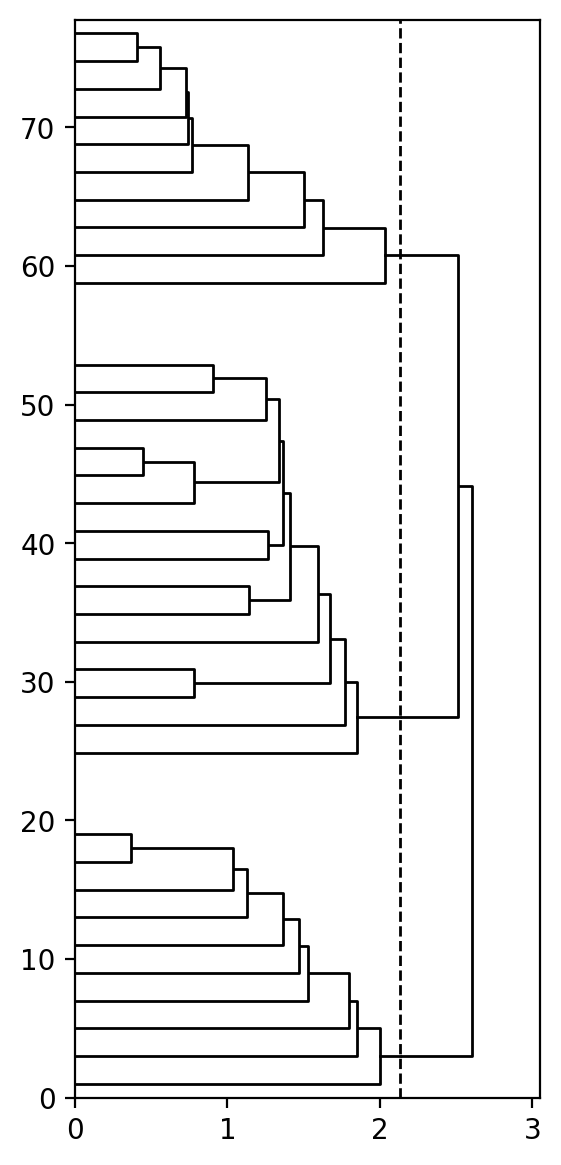

expected an indented block after function definition on line 79 (heatmap.py, line 81)
expected an indented block after function definition on line 79 (heatmap.py, line 81)
invalid syntax (heatmap.py, line 80)
invalid syntax (heatmap.py, line 80)
expected an indented block after function definition on line 80 (heatmap.py, line 83)
expected an indented block after function definition on line 80 (heatmap.py, line 83)
expected ':' (heatmap.py, line 81)
expected ':' (heatmap.py, line 81)
expected ':' (heatmap.py, line 83)
expected ':' (heatmap.py, line 83)
expected ':' (heatmap.py, line 84)
expected ':' (heatmap.py, line 84)
expected an indented block after function definition on line 249 (heatmap.py, line 251)
expected an indented block after function definition on line 249 (heatmap.py, line 251)
expected an indented block after function definition on line 124 (heatmap.py, line 126)
expected an indented block after function definition on line 124 (heatmap.py, line 126)
expected an indented

In [42]:
_, ax = plt.subplots(figsize=(3, 7))
gdg = hg.GroupDendrogram([hg.Dendrogram(data) for data in datasets])
gdg.draw(ax, orient="v", spacing=0.05)
#ax.invert_xaxis()

[0.1857142857142857, 0.05, 0.3285714285714285, 0.05, 0.1857142857142857]


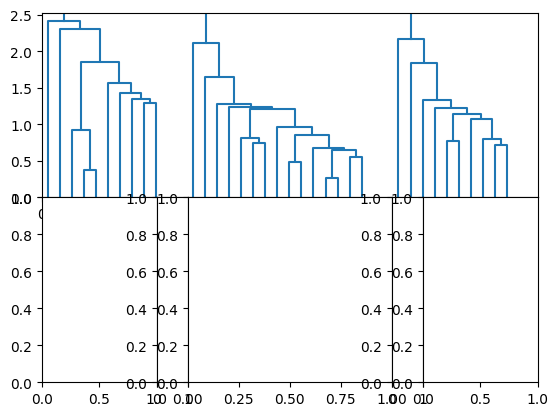

In [51]:
gdg = hg.GroupDendrogram([hg.Dendrogram(data) for data in datasets])

data_count = data_count[gdg.reorder_index]
n = len(data_count)
inject_width = 0.05
wr = []
for i, p in enumerate((data_count / data_count.sum()) - (n - 1) * inject_width):
    wr.append(p)
    if i != (n-1):
        wr.append(inject_width)
print(wr)
        
figure = plt.figure()
gs = GridSpec(2, 5, figure=figure, wspace=0, hspace=0, 
              width_ratios=wr)

main_ax = figure.add_subplot(gs[0, :])
ax1 = figure.add_subplot(gs[1, 0])
_ = figure.add_subplot(gs[1, 1])
ax2 = figure.add_subplot(gs[1, 2])
_ = figure.add_subplot(gs[1, 3])
ax3 = figure.add_subplot(gs[1, 4])

gdg.draw(main_ax, spacing=0.05)


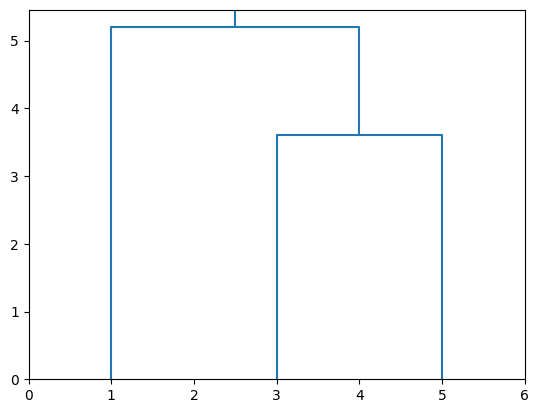

In [22]:
fig, ax = plt.subplots()
data = np.random.randint(0, 10, (3, 3))
dg = hg.Dendrogram(data)
dg.draw(ax, add_root=True)

In [26]:
plot_data = dg._plot_data
x = np.array(plot_data['icoord']) / 5
y = np.array(plot_data['dcoord'])
plot_data

{'icoord': [[15.0, 15.0, 25.0, 25.0], [5.0, 5.0, 20.0, 20.0]],
 'dcoord': [[0.0, 3.605551275463989, 3.605551275463989, 0.0],
  [0.0, 5.196152422706632, 5.196152422706632, 3.605551275463989]],
 'ivl': ['2', '0', '1'],
 'leaves': [2, 0, 1],
 'color_list': ['C1', 'C0'],
 'leaves_color_list': ['C0', 'C1', 'C1']}

In [27]:
x

array([[3., 3., 5., 5.],
       [1., 1., 4., 4.]])

In [30]:
skeleton = np.sort(x[y == 0])
ranger = [(skeleton[i], skeleton[i+1]) for i in range(len(skeleton) - 1)]

In [31]:
ranger

[(1.0, 3.0), (3.0, 5.0)]

In [15]:
ix = []
for i, r in enumerate(y):
    if (r[0] == 0) & (r[-1] == 0):
        ix.append(i)

In [17]:
x[ix]

array([[ 5.,  5.,  7.,  7.],
       [ 9.,  9., 11., 11.],
       [13., 13., 15., 15.],
       [17., 17., 19., 19.]])